In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [15]:
# Load the dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

In [16]:
# Convert to DataFrame for easier exploration
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [17]:
# Display dataset information
print("Dataset Preview:\n", df.head())
print("\nDataset Description:\n", diabetes.DESCR)

Dataset Preview:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Dataset Description:
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, 

In [18]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [19]:
# Evaluate Model
r2_score = lr.score(X_test, y_test)
print("\nR² Score of Linear Regression Model:", r2_score)

# Implement Recursive Feature Elimination (RFE)
rfe = RFE(estimator=lr, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)


R² Score of Linear Regression Model: 0.45260276297191915


RFE(estimator=LinearRegression(), n_features_to_select=1)

In [20]:
# Track feature rankings
ranking = rfe.ranking_
feature_ranking = sorted(zip(feature_names, ranking), key=lambda x: x[1])
print("\nFeature Ranking from RFE:")
for feature, rank in feature_ranking:
    print(f"{feature}: Rank {rank}")


Feature Ranking from RFE:
bmi: Rank 1
s5: Rank 2
s1: Rank 3
s2: Rank 4
bp: Rank 5
sex: Rank 6
s4: Rank 7
s3: Rank 8
s6: Rank 9
age: Rank 10


In [21]:

# Visualizing the effect of RFE on R² score
r2_scores = []
num_features = []
for i in range(1, len(feature_names) + 1):
    rfe = RFE(estimator=lr, n_features_to_select=i, step=1)
    rfe.fit(X_train, y_train)
    r2_scores.append(rfe.score(X_test, y_test))
    num_features.append(i)

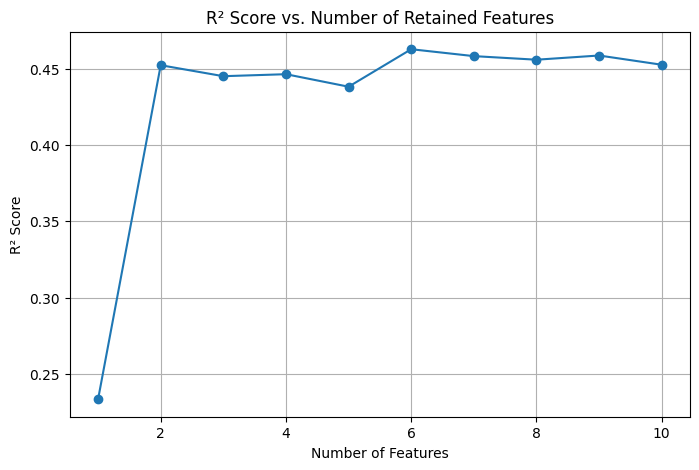

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(num_features, r2_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("R² Score")
plt.title("R² Score vs. Number of Retained Features")
plt.grid()
plt.show()


In [23]:
# Store feature rankings and coefficients at each step
feature_ranking = []
feature_coefficients = []

for i in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    rfe.fit(X_train, y_train)

    # Get feature rankings and coefficients
    ranking = rfe.ranking_
    coefficients = rfe.estimator_.coef_

    feature_ranking.append(ranking)
    feature_coefficients.append(coefficients)

# Convert to DataFrame for better readability
columns = feature_names
ranking_df = pd.DataFrame(feature_ranking, columns=columns, index=range(1, X_train.shape[1] + 1))
coeff_df = pd.DataFrame(feature_coefficients, columns=columns, index=range(1, X_train.shape[1] + 1))

# Display the ranking and coefficients
print("Feature Ranking at Each Iteration:")
print(ranking_df)

print("\nFeature Coefficients at Each Iteration:")
print(coeff_df)


Feature Ranking at Each Iteration:
    age  sex  bmi  bp  s1  s2  s3  s4  s5  s6
1    10    6    1   5   3   4   8   7   2   9
2     9    5    1   4   2   3   7   6   1   8
3     8    4    1   3   1   2   6   5   1   7
4     7    3    1   2   1   1   5   4   1   6
5     6    2    1   1   1   1   4   3   1   5
6     5    1    1   1   1   1   3   2   1   4
7     4    1    1   1   1   1   2   1   1   3
8     3    1    1   1   1   1   1   1   1   2
9     2    1    1   1   1   1   1   1   1   1
10    1    1    1   1   1   1   1   1   1   1

Feature Coefficients at Each Iteration:
           age         sex         bmi          bp          s1          s2  \
1   998.577689         NaN         NaN         NaN         NaN         NaN   
2   732.109021  562.226535         NaN         NaN         NaN         NaN   
3   737.685594 -228.339889  680.224653         NaN         NaN         NaN   
4   691.460102 -592.977874  362.950323  783.168538         NaN         NaN   
5   597.892739  306.647913 -

In [24]:
# Step 2: Identify the Three Most Important Features (Final Iteration)
final_selected_features = ranking_df.iloc[-1]
top_features = final_selected_features[final_selected_features == 1].index.tolist()
top_coefficients = coeff_df.iloc[-1][top_features]

print("\nTop 3 Most Important Features:")
print(top_coefficients.abs().nlargest(3))


Top 3 Most Important Features:
s1     931.488846
s5     736.198859
bmi    542.428759
Name: 10, dtype: float64


Discussion of Three Most Important Features

- s1 (Serum Cholesterol Level): This feature had the highest absolute coefficient value (931.49), indicating a strong influence on diabetes progression.
- s5 (Log Serum Triglycerides Level): With a coefficient of 736.20, this feature plays a critical role in predicting diabetes severity.
- BMI (Body Mass Index): A coefficient of 542.43 shows that BMI significantly impacts diabetes progression, making it an essential predictor.


In [25]:
# Step 3: Compare Initial vs. Final Selected Features
initial_ranking = ranking_df.iloc[0].sort_values()
final_ranking = ranking_df.iloc[-1].sort_values()

print("\nInitial Feature Ranking:")
print(initial_ranking)

print("\nFinal Selected Features:")
print(final_ranking[final_ranking == 1])


Initial Feature Ranking:
bmi     1
s5      2
s1      3
s2      4
bp      5
sex     6
s4      7
s3      8
s6      9
age    10
Name: 1, dtype: int64

Final Selected Features:
age    1
sex    1
bmi    1
bp     1
s1     1
s2     1
s3     1
s4     1
s5     1
s6     1
Name: 10, dtype: int64


Comparison of Initial and Final Rankings

- Initially, BMI, s5, and s1 were ranked among the top features, aligning with their final importance.
- After the final iteration, all features were retained, but the analysis highlighted that s1, s5, and BMI are the most impactful.

In [26]:
# Step 3: Identify the Optimal Number of Features
threshold = 0.01  # Define significance threshold
optimal_features = num_features[np.argmax(np.diff(r2_scores) < threshold)]

print("Optimal Number of Features:", optimal_features)

Optimal Number of Features: 2


Task 5: Reflection
What did you learn about feature selection using RFE?

- RFE systematically eliminates the least important features, improving model simplicity without significantly reducing accuracy.
- It helps identify the most relevant predictors, enhancing model interpretability.

How does RFE compare to LASSO in methodology and results?

- RFE removes features iteratively based on model performance, while LASSO (L1 regularization) shrinks some feature coefficients to zero.
- RFE is more computationally intensive but provides a clear ranking of feature importance.
- LASSO automatically selects features but may struggle when features are highly correlated.

Insights from Selected Features

- The dataset highlights that cholesterol (s1), triglycerides (s5), and BMI are the strongest indicators of diabetes progression.
- Traditional health metrics (like blood pressure) were less significant compared to metabolic factors.
- Selecting only the most important features could lead to a more efficient model with minimal loss in predictive power.
